In [60]:
from ipynb.fs.defs.Pocket_Cube_Visualizer import cube_visualizer,cube

import numpy as np
import matplotlib.pyplot as plt

import queue
import random

In [2]:
%matplotlib notebook

In [3]:
w={} #map of id->sequence of moves

c=cube()

q=queue.Queue()
q.put(c)
w[c.get_id()]=[]

while (not q.empty()):
    c=q.get()
    
    for x in range(6):
        c2=cube(c)
        c2.move(x)
        
        if c2.get_id() not in w:
            q.put(c2)
            w[c2.get_id()]=w[c.get_id()]+[x]
            
            if (len(w)%100000==0):
                print(len(w))


100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000
2300000
2400000
2500000
2600000
2700000
2800000
2900000
3000000
3100000
3200000
3300000
3400000
3500000
3600000


In [4]:
len(w)

3674160

In [22]:
cnt=[0]*20

In [23]:
for (key,value) in w.items():
    cnt[len(value)]+=1

In [24]:
cnt

[1,
 6,
 27,
 120,
 534,
 2256,
 8969,
 33058,
 114149,
 360508,
 930588,
 1350852,
 782536,
 90280,
 276,
 0,
 0,
 0,
 0,
 0]

<IPython.core.display.Javascript object>


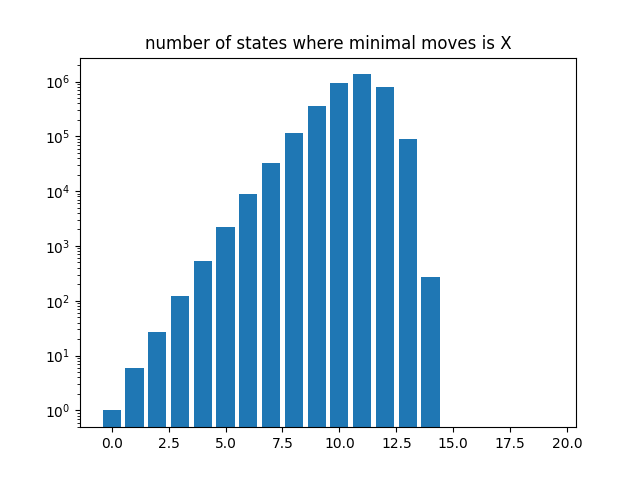

In [30]:
fig=plt.figure()
ax=plt.subplot(111)

ax.bar(np.arange(20),cnt)

plt.title("number of states where minimal moves is X")

plt.yscale('log')
plt.show()

In [27]:
for (key,value) in w.items():
    if (len(value)==14):
        print(value)

[0, 0, 2, 0, 0, 2, 0, 3, 4, 2, 2, 4, 3, 5]
[0, 0, 2, 0, 0, 2, 0, 5, 2, 5, 2, 0, 3, 4]
[0, 0, 2, 0, 0, 2, 0, 5, 2, 5, 2, 4, 3, 0]
[0, 0, 2, 0, 0, 2, 1, 3, 4, 2, 2, 4, 3, 0]
[0, 0, 2, 0, 0, 2, 1, 4, 1, 2, 5, 3, 0, 0]
[0, 0, 2, 0, 0, 2, 4, 1, 4, 0, 0, 4, 3, 5]
[0, 0, 2, 0, 0, 2, 4, 3, 0, 5, 2, 0, 3, 0]
[0, 0, 2, 0, 0, 2, 4, 3, 0, 5, 2, 4, 3, 4]
[0, 0, 2, 0, 0, 2, 5, 1, 2, 4, 4, 2, 1, 2]
[0, 0, 2, 0, 0, 2, 5, 2, 1, 4, 3, 1, 4, 4]
[0, 0, 2, 0, 0, 3, 0, 3, 4, 3, 5, 2, 2, 0]
[0, 0, 2, 0, 0, 3, 0, 5, 2, 1, 2, 0, 2, 2]
[0, 0, 2, 0, 0, 3, 4, 1, 2, 1, 4, 2, 4, 4]
[0, 0, 2, 0, 0, 3, 4, 3, 4, 1, 3, 0, 0, 4]
[0, 0, 2, 0, 0, 4, 3, 1, 3, 0, 5, 2, 4, 4]
[0, 0, 2, 0, 0, 4, 3, 5, 3, 0, 5, 0, 4, 4]
[0, 0, 2, 0, 0, 5, 0, 2, 1, 4, 3, 0, 3, 0]
[0, 0, 2, 0, 0, 5, 0, 4, 1, 4, 3, 4, 3, 0]
[0, 0, 2, 0, 0, 5, 2, 0, 5, 0, 5, 2, 1, 5]
[0, 0, 2, 0, 0, 5, 2, 1, 2, 0, 3, 4, 4, 3]
[0, 0, 2, 0, 0, 5, 2, 4, 3, 4, 1, 2, 5, 3]
[0, 0, 2, 0, 0, 5, 2, 5, 0, 4, 3, 4, 4, 3]
[0, 0, 2, 0, 2, 1, 2, 0, 2, 5, 2, 5, 3, 1]
[0, 0, 2, 0

Example of a cube that needs 14 moves.

In [31]:
c=cube()

In [32]:
for i in [0, 0, 2, 0, 0, 2, 0, 3, 4, 2, 2, 4, 3, 5]:
    c.move(i)

<IPython.core.display.Javascript object>


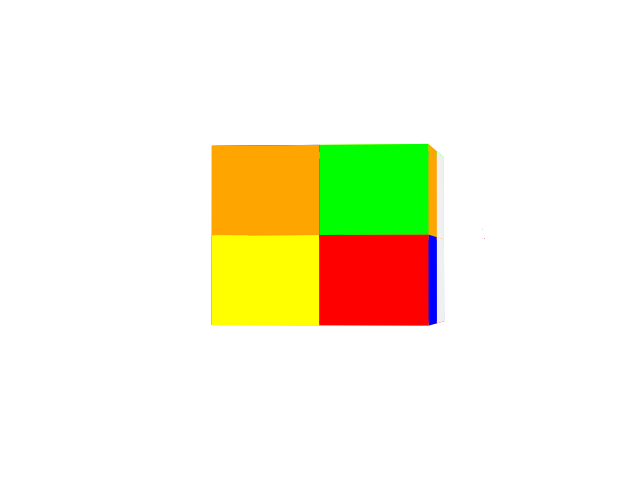

In [33]:
c.plot()

Now we need to define the composition of 2 cubes.

However, we represented the cube as a permutation of it's stickers, so we can inherit the composition of permutations.

In [45]:
def composition(i,j):
    res=cube()
    
    for x in range(24):
        temp=j.arr[x//4][x%4]
        res.arr[x//4][x%4]=i.arr[temp//4][temp%4]
        
    return res

In [36]:
c=cube()

u=cube()
u.U()

l=cube()
l.L()

<IPython.core.display.Javascript object>


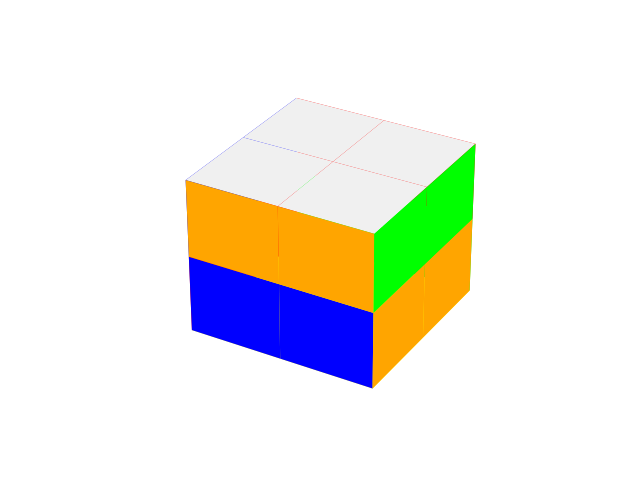

In [37]:
u.plot()

<IPython.core.display.Javascript object>


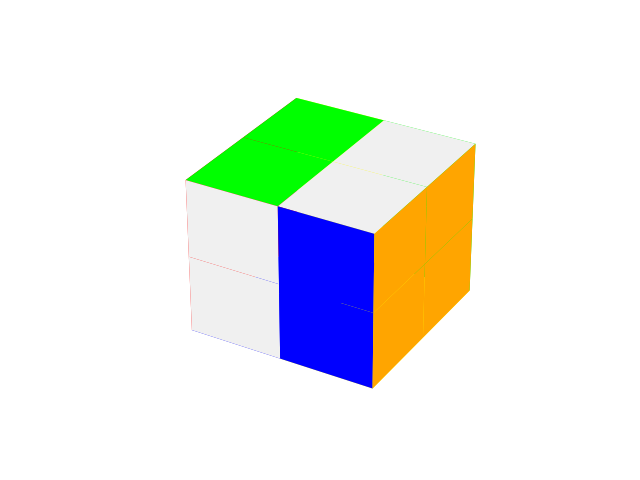

In [38]:
l.plot()

<IPython.core.display.Javascript object>


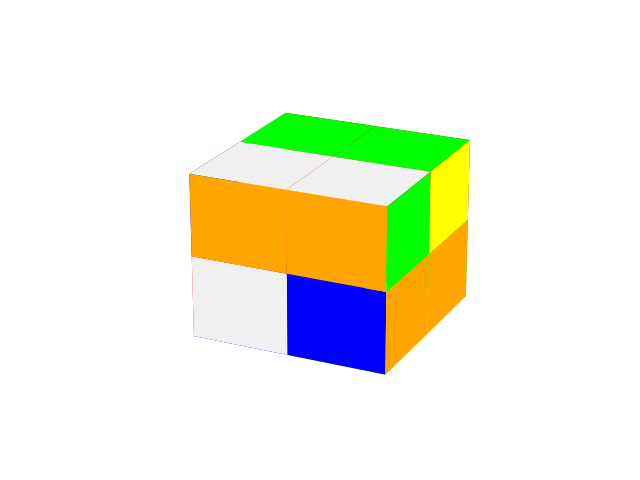

In [46]:
lu=composition(l,u)
lu.plot()

<IPython.core.display.Javascript object>


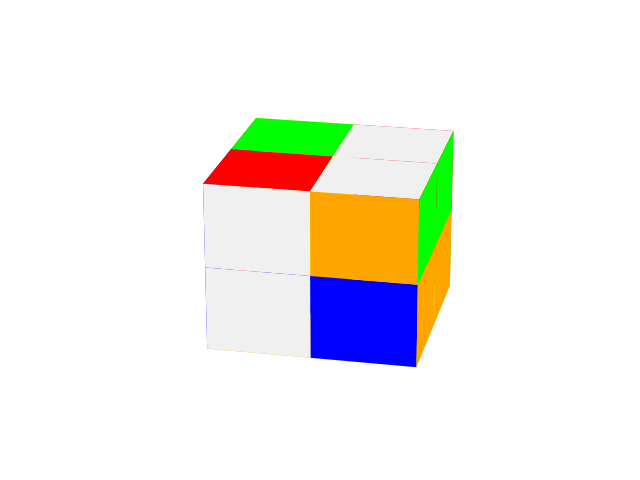

In [47]:
ul=composition(u,l)
ul.plot()

We also have to have a function to find the minimum distance between 2 elements.

$x \leadsto y$ is the same as $x \leadsto 1_e \leadsto y$.

The transformation is $x^{-1}y$. So we just have to find the distance of the element $x^{-1}y$.

If we know a sequence of moves $abc$ to get to $x$ then $x^{-1}$ is $c^{-1}b^{-1}a^{-1}$

In [49]:
def dist(i,j): #this takes in a pair of ids
    c=cube()
    
    for x in range(len(w[i])-1,-1,-1):
        c.move(w[i][x]^1)
    for x in range(len(w[j])):
        c.move(w[j][x])
        
    return len(w[c.get_id()])

In [52]:
dist(c.get_id(),u.get_id())

1

In [51]:
dist(l.get_id(),u.get_id())

2

For fun, we can try to see devil's algorithm on some random permutation of the states.

In [61]:
states=list(w.keys())

In [72]:
for shots in range(10):
    random.shuffle(states)
    num=0
    for x in range(10000):
        num+=dist(states[x],states[x+1])

    print(num)

106636
106736
106597
106724
106632
106653
106636
106687
106711
106715


It takes way too long to run. But we can see that it probably is somewhere around $10.66*states \approx 39 \cdot 10^6$.

In [74]:
identity=cube().get_id()
identity

4737649541975930160

In [92]:
cnt=[0]*50

In [93]:
for (key,val) in list(w.items())[:100000]:
    curr=cube()
    nxt=cube()
    for dirr in val:
        nxt.move(dirr)
        
    order=0
    while (True):
        curr=composition(curr,nxt)
        order+=1
        
        if (curr.get_id()==identity):
            break
    
    cnt[order]+=1

In [94]:
cnt

[0,
 1,
 236,
 2043,
 2522,
 2516,
 12739,
 18140,
 0,
 7842,
 2550,
 0,
 19647,
 0,
 0,
 9646,
 0,
 0,
 13340,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 5232,
 0,
 0,
 0,
 0,
 0,
 3546,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

<IPython.core.display.Javascript object>


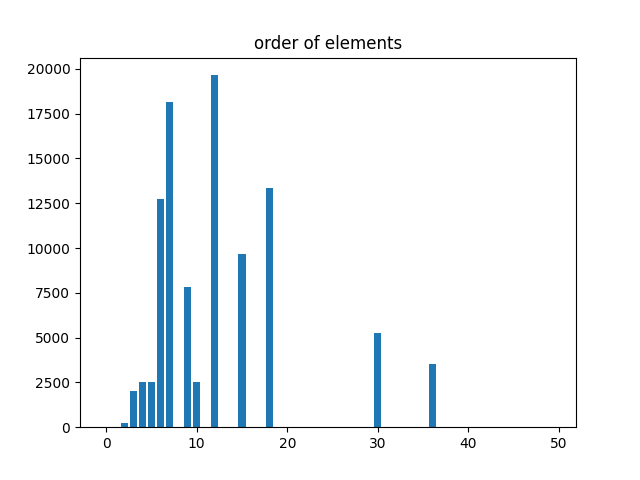

In [96]:
fig=plt.figure()
ax=plt.subplot(111)

ax.bar(np.arange(50),cnt)

plt.title("order of elements")

plt.show()